In [48]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [49]:
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.mnist.load_data()
train_images=train_images.reshape((60000,28*28))/255.0
test_images=test_images.reshape((10000,28*28))/255.0

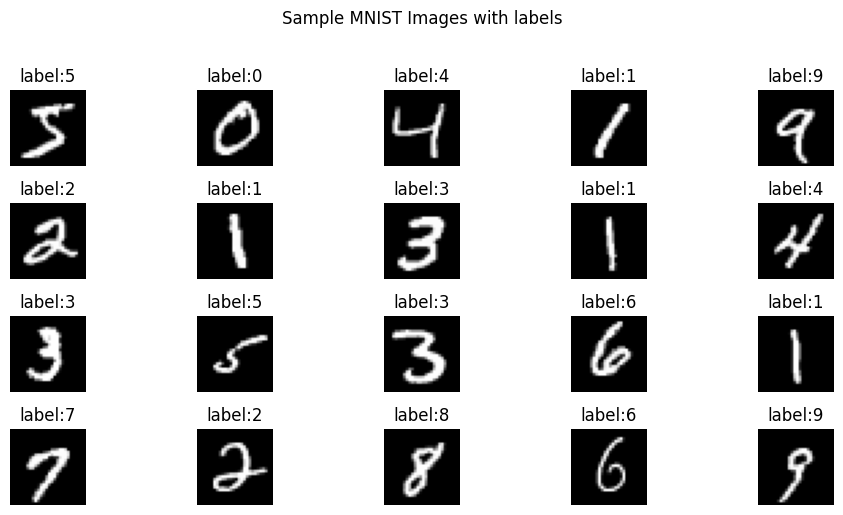

In [50]:
plt.figure(figsize=(10,5))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(train_images[i].reshape(28,28),cmap='gray')
    plt.title(f"label:{train_labels[i]}")
    plt.axis('off')
plt.suptitle('Sample MNIST Images with labels',y=1.02)
plt.tight_layout()
plt.show()

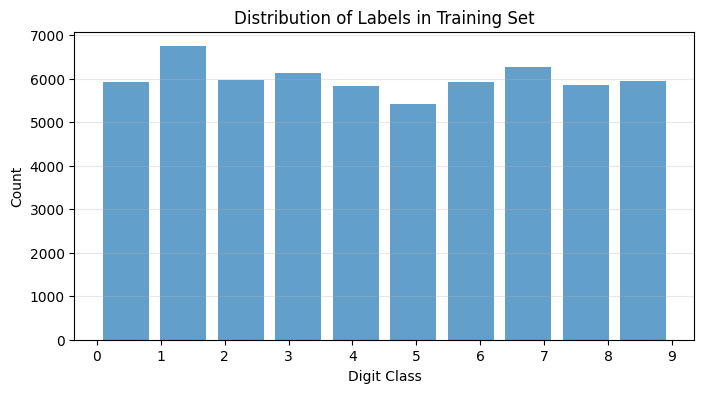

In [51]:
plt.figure(figsize=(8, 4))
plt.hist(train_labels, bins=10, rwidth=0.8, alpha=0.7)
plt.xticks(range(10))
plt.title('Distribution of Labels in Training Set')
plt.xlabel('Digit Class')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [52]:
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)

model1 = Sequential()
model1.add(Dense(256, activation='relu', input_shape=(784,), kernel_regularizer=l1(0.0005)))
model1.add(BatchNormalization())
model1.add(Dense(128, activation='relu', kernel_regularizer=l1(0.0005)))
model1.add(BatchNormalization())
model1.add(Dense(10, activation='softmax'))

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("\nTraining Model 1")
history1 = model1.fit(train_images, train_labels,
                      epochs=30,
                      batch_size=128,
                      validation_data=(test_images, test_labels),
                      callbacks=[lr_scheduler, early_stop])

model2 = Sequential()
model2.add(Dense(256, activation='relu', input_shape=(784,), kernel_regularizer=l2(0.001)))
model2.add(BatchNormalization())
model2.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model2.add(BatchNormalization())
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("\nTraining Model 2")
history2 = model2.fit(train_images, train_labels,
                      epochs=30,
                      batch_size=128,
                      validation_data=(test_images, test_labels),
                      callbacks=[lr_scheduler, early_stop])



Training Model 1
Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8877 - loss: 3.1536 - val_accuracy: 0.9227 - val_loss: 1.0702 - learning_rate: 0.0010
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9558 - loss: 0.8018 - val_accuracy: 0.9363 - val_loss: 0.6489 - learning_rate: 0.0010
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9598 - loss: 0.5332 - val_accuracy: 0.9509 - val_loss: 0.4886 - learning_rate: 0.0010
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9619 - loss: 0.4283 - val_accuracy: 0.9606 - val_loss: 0.3887 - learning_rate: 0.0010
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9667 - loss: 0.3547 - val_accuracy: 0.9534 - val_loss: 0.3790 - learning_rate: 0.0010
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9708 - loss: 0.3159 - val_accuracy: 0.9510 - val_loss: 0.3681 - learning_rate: 0.0010
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9704

In [76]:
loss1, acc1 = model1.evaluate(test_images, test_labels)
loss2, acc2 = model2.evaluate(test_images, test_labels)
print(f"\nModel 1 (L1) Test Accuracy: {acc1:.4f}")
print(f"Model 2 (L2) Test Accuracy: {acc2:.4f}")
print(f"\nModel 1 (L1) Test Loss: {loss1:.4f}")
print(f"Model 2 (L2) Test Loss: {loss2:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9776 - loss: 0.1321
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9837 - loss: 0.0854

Model 1 (L1) Test Accuracy: 0.9817
Model 2 (L2) Test Accuracy: 0.9867

Model 1 (L1) Test Loss: 0.1173
Model 2 (L2) Test Loss: 0.0706


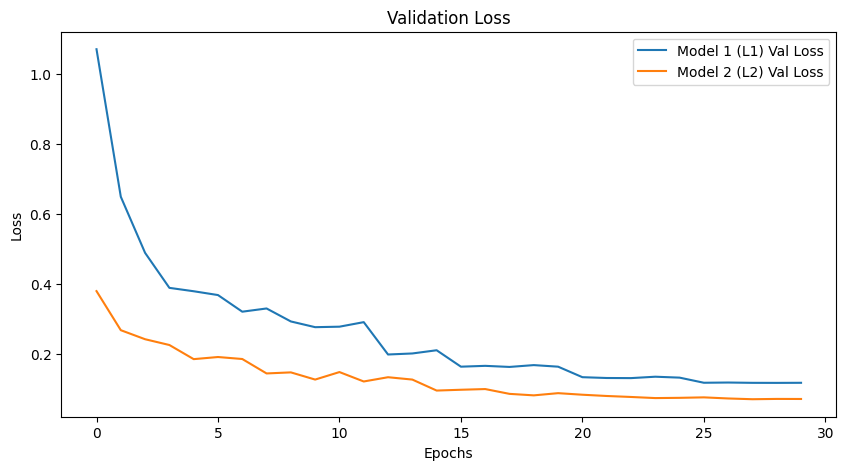

In [54]:
plt.figure(figsize=(10, 5))
plt.plot(history1.history['val_loss'], label='Model 1 (L1) Val Loss')
plt.plot(history2.history['val_loss'], label='Model 2 (L2) Val Loss')
plt.title("Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

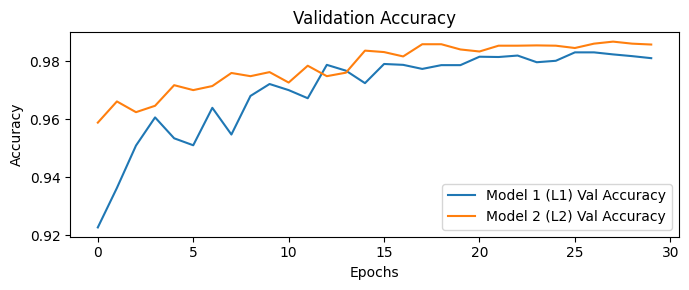

In [75]:
plt.figure(figsize=(7, 3))
plt.plot(history1.history['val_accuracy'], label='Model 1 (L1) Val Accuracy')
plt.plot(history2.history['val_accuracy'], label='Model 2 (L2) Val Accuracy')
plt.title("Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

<span style="font-size:20px">Model 1 (L1 Regularization)

- Accuracy: 98.17%
- Test Loss: 0.1173

<span style="font-size:20px">Model 2 (L2 Regularization)

- Accuracy: 98.67%
- Test Loss: 0.0706

<span style="font-size:20px">Conclusion

- Model 2 with L2 regularization performed better in terms of accuracy, stability, and generalization. It is more suitable for achieving high performance on test data while avoiding overfitting.
